   timestamp          price  daily_return
0 2025-02-01  102382.394097      0.000000
1 2025-02-02  100674.787625     -1.667871
2 2025-02-03   97568.316530     -3.085650
3 2025-02-04  101466.860666      3.995707
4 2025-02-05   98118.439217     -3.300015
   timestamp        price  daily_return
0 2025-02-01  3296.390635      0.000000
1 2025-02-02  3125.038680     -5.198169
2 2025-02-03  2862.697619     -8.394810
3 2025-02-04  2877.813824      0.528041
4 2025-02-05  2740.380976     -4.775599


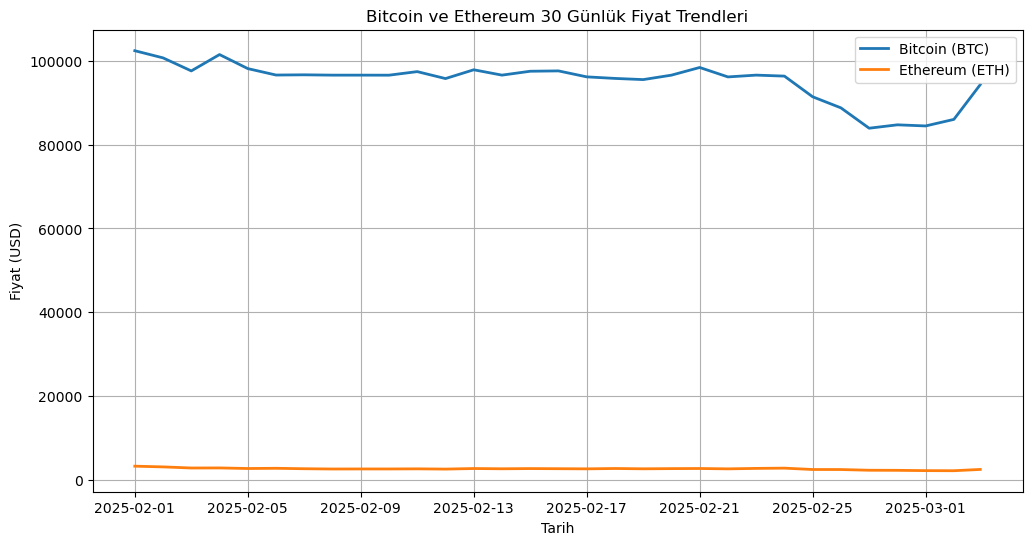

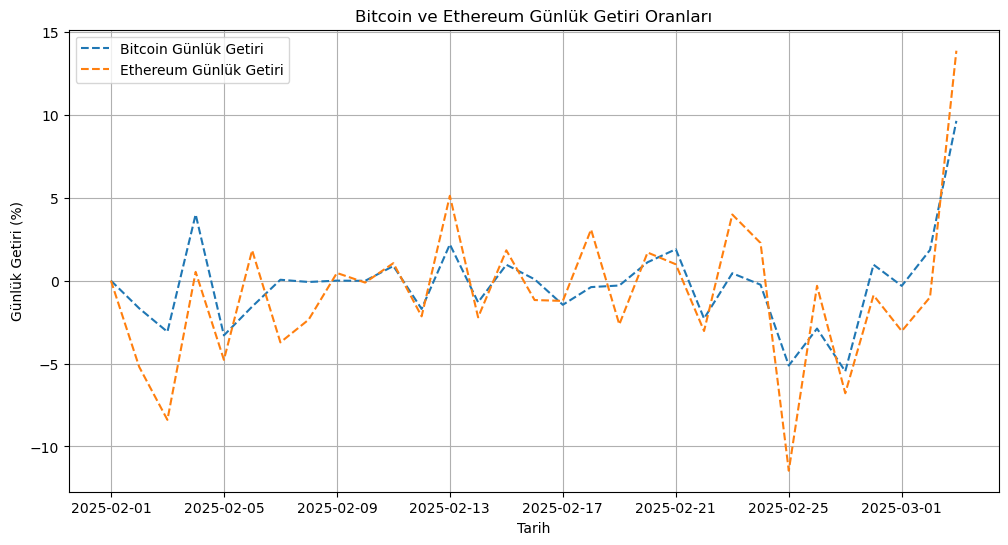

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# CoinGecko API'den veri çekme fonksiyonu
def get_crypto_data(crypto_id, days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency=usd&days={days}&interval=daily"
    response = requests.get(url)
    data = response.json()
    
    prices = data['prices']  # Günlük fiyat verileri
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Zaman damgasını düzenleme
    
    # Günlük getiri hesaplama
    df['daily_return'] = df['price'].pct_change() * 100  # Yüzdelik değişim
    df.loc[:, 'daily_return'] = df['daily_return'].fillna(0)  # Uyarıyı önler
    
    print(df.head())  # Veriyi kontrol et
    
    return df

# Bitcoin ve Ethereum verilerini çekme
btc_data = get_crypto_data('bitcoin')
eth_data = get_crypto_data('ethereum')

# Fiyat trend grafiği
plt.figure(figsize=(12,6))
plt.plot(btc_data['timestamp'], btc_data['price'], label='Bitcoin (BTC)', linewidth=2)
plt.plot(eth_data['timestamp'], eth_data['price'], label='Ethereum (ETH)', linewidth=2)
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.title('Bitcoin ve Ethereum 30 Günlük Fiyat Trendleri')
plt.legend()
plt.grid()
plt.show()

# Günlük getiri grafiği
plt.figure(figsize=(12,6))
plt.plot(btc_data['timestamp'], btc_data['daily_return'], label='Bitcoin Günlük Getiri', linestyle='dashed')
plt.plot(eth_data['timestamp'], eth_data['daily_return'], label='Ethereum Günlük Getiri', linestyle='dashed')
plt.xlabel('Tarih')
plt.ylabel('Günlük Getiri (%)')
plt.title('Bitcoin ve Ethereum Günlük Getiri Oranları')
plt.legend()
plt.grid()
plt.show()